In [1]:
######################################
# DEPENDENCIES
######################################
import os
import math
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## The Data
From the __[NASA Exoplanet archive](https://exoplanetarchive.ipac.caltech.edu/index.html)__, we have retrieved 3 data tables:
 - A table storing information relating to each exoplanet & its planetary system
 - A table storing information relating to the transit spectroscopy of exoplanet
 - A table storing information relating to the emission spectroscopy of exoplanet


In [44]:
#Raw Data Tables
systems_df = pd.read_csv('data/PS_2021.12.02_11.43.14.csv', sep=',', low_memory=False)

transitspec_df = pd.read_csv('data/transitspec_2021.10.21_17.04.26.csv', sep=',', low_memory=False)

emispec_df = pd.read_csv('data/emissionspec_2021.10.22_13.36.00.csv', sep=',', low_memory=False)

## Discovery Method
The most important and generalized information is stored in the "Planetary Systems" database, which we will be calling _systems_df_. This is general information about the discovery of the planets, what system they are from, and the most pertinant information about the exoplanet and system.

Notice that in this table, we have included the 'discovery method' column, as this is relevant to the interpretation of all other features. Particularly, notice that there is associated with the plantary mass a 'provenance', which indicates wether or not a planet's mass is given as a "True Mass" or as a lower bound on planetary mass, depending on the discovery method. 

We will stratify the data by its method of discovery, so that meaningful comparisons can be made between rows. One of the most common and successful discovery methods is the transit method, which refers to observations of a planet which passes directly in between it's host star and the viewer, altering the observed light effects:

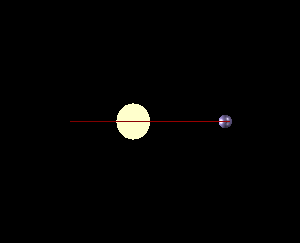

(image in public domain)

We will start by working on the data obtained by this method, and then move on to other popular methods such as Radial Velocity, Direct Imaging, or Microlensing. 

In [56]:
#ASK: what are the MOST ESSENTIAL features?
for col in systems_df.columns:
    print(col)


pl_name
hostname
default_flag
sy_snum
sy_pnum
discoverymethod
pl_controv_flag
pl_orbper
pl_orbsmax
pl_rade
pl_radj
pl_bmasse
pl_bmassprov
pl_orbeccen
pl_insol
pl_eqt
ttv_flag
st_spectype
st_teff
st_rad
st_mass
st_met
st_metratio
st_logg
rastr
ra
decstr
dec
sy_dist
sy_vmag
sy_kmag
sy_gaiamag


## Strata

In [69]:

#To avoid controversy, remove rows with nonzero 'controversial' flag
systems_df = systems_df[systems_df['pl_controv_flag'] == 0]

#***
#stratify by method, as described above.
total_default = len(systems_df[systems_df['default_flag']==1])
print(f"total number of \'default readings\': {total_default}\n")

pl_systems_transit = systems_df[systems_df['discoverymethod'] == 'Transit']
print(f"num rows by Transit method: {len(pl_systems_transit)}")
print(f"% default: {len(pl_systems_transit[pl_systems_transit['default_flag'] == 1])/len(pl_systems_transit)}")
print(f"% of total default: {len(pl_systems_transit[pl_systems_transit['default_flag'] == 1])/total_default}\n")

pl_systems_radial = systems_df[systems_df['discoverymethod'] == 'Radial Velocity']
print(f"num rows by Radial Velocity method: {len(pl_systems_radial)}")
print(f"% default: {len(pl_systems_radial[pl_systems_radial['default_flag'] == 1])/len(pl_systems_radial)}")
print(f"% of total default: {len(pl_systems_radial[pl_systems_radial['default_flag'] == 1])/total_default}\n")

pl_systems_img = systems_df[systems_df['discoverymethod'] == 'Imaging']
print(f"num rows by Direct Imaging method: {len(pl_systems_img)}")
print(f"% default: {len(pl_systems_img[pl_systems_img['default_flag'] == 1])/len(pl_systems_img)}")
print(f"% of total default: {len(pl_systems_img[pl_systems_img['default_flag'] == 1])/total_default}\n")

pl_systems_microlens = systems_df[systems_df['discoverymethod'] == 'Microlensing']
print(f"num rows by Microlensing method: {len(pl_systems_microlens)}")
print(f"% default: {len(pl_systems_microlens[pl_systems_microlens['default_flag'] == 1])/len(pl_systems_microlens)}")
print(f"% of total default: {len(pl_systems_microlens[pl_systems_microlens['default_flag'] == 1])/total_default}\n")

pl_systems_eclipse = systems_df[systems_df['discoverymethod'] == 'Eclipse Timing Variations']
print(f"num rows by Eclipse Timing method: {len(pl_systems_eclipse)}")
print(f"% default: {len(pl_systems_eclipse[pl_systems_eclipse['default_flag'] == 1])/len(pl_systems_astro)}")
print(f"% of total default: {len(pl_systems_astro[pl_systems_astro['default_flag'] == 1])/total_default}\n")

#***

pl_names = systems_df['pl_name']
host_names = systems_df['hostname']

total number of 'default readings': 4551

num rows by Transit method: 26956
% default: 0.12754117821635258
% of total default: 0.7554383651944627

num rows by Radial Velocity method: 1996
% default: 0.44639278557114226
% of total default: 0.19578114700065918

num rows by Direct Imaging method: 101
% default: 0.504950495049505
% of total default: 0.01120632827949901

num rows by Microlensing method: 342
% default: 0.3508771929824561
% of total default: 0.026367831245880026

num rows by Astrometry method: 19
% default: 0.7368421052631579
% of total default: 0.0030762469786860033



As we can see from the above calculations, the Transit method is the most common and popular, yet the least reliable, going by the readings which are flagged as 'default' for that particular exoplanet. On the other hand, Radial velocity, though less reliable than Direct Imaging, has a good amount of default readings, and also has a higher amount of features.

## Imputation
Because this dataset contains a significant amount of missing values, we will experiment with imputing the missing values, in order to avoid throwing away whole planet rows.

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0, imputation_order='ascending', add_indicator=True)




25426


## Our Solar System

There is actually one datapoint that we can confidently label as 'habitable' and that is our home system of the sun, and our home planet of earth. Once we have discovered the underlying distribution of all other exoplanet systems, this information may be used to create a discrete classification for exoplanets that seem to be in a similar ballpark.

In [5]:

#extract the stellar features of highest importance from this table
# - Host Star Name (optional)
# - Stellar Mass
# - Stellar Metallicity
# - Stellar Effective temperature
starinfo_df = systems_df[['st_mass', 'st_met', 'st_teff']]

#define these same features for our sun (source: Wikipedia)
SUN_MASS = 1
SUN_MET = 0.0122
SUN_TEFF = 5772

m_sun = np.array([SUN_MASS,
                 SUN_MET,
                 SUN_TEFF])


4542


## Unsupervised approach
Notice that this data is unlabeled. This means that most of the techniques that we have employed in this course thus far will not be applicable immediately, as we are not able to regress or classify based on some underlying mapping between between our input space of data, and an output space of labellings. 

We are left with a choice between two options. We could:
 - A -- Manually create labellings for our data points, either by hand or by some iterative approach,
  or
 - B -- Employ unsupervised, generative learning models in order to build our understanding from the ground up

We have chosen to go ahead with option B, employing an unsupervised learning approach. This is justified not only by the present relevance of such methods in the field, but by the fact that had we taken approach A, our learning model would merely be seeking to mimic whatever function we use to label the data. Once we have explored these unsupervised approaches, it may be possible to apply discrete class labellings to the data in a more meaningful way.

## Gaussian Mean and Variance

In [6]:
starinfo_x = starinfo_df.dropna()
#The line above is somewhat problematic due to the erasure of some potentially valid data

starinfo_mean = starinfo_x.mean();

print("mean vector of stellar features:\n {0} \n".format(starinfo_mean))

print("covariance of key stellar features")
cov_X = starinfo_x.cov()
print(cov_X)

print("\ncorrelation of key stellar features")
corr_X = starinfo_x.corr()
print(corr_X)

print(starinfo_x)

mean vector of stellar features:
 st_mass       0.963049
st_met       -0.032020
st_teff    5506.199830
dtype: float64 

covariance of key stellar features
            st_mass    st_met        st_teff
st_mass    0.108597  0.015115     130.920613
st_met     0.015115  0.051251       8.992934
st_teff  130.920613  8.992934  512870.653409

correlation of key stellar features
          st_mass    st_met   st_teff
st_mass  1.000000  0.202608  0.554746
st_met   0.202608  1.000000  0.055469
st_teff  0.554746  0.055469  1.000000
       st_mass  st_met  st_teff
0         2.70  -0.350  4742.00
3         2.78  -0.020  4213.00
4         1.80   0.040  4340.00
6         2.20  -0.240  4813.00
7         0.97   0.405  5314.94
...        ...     ...      ...
29975     1.15   0.101  6105.51
29978     1.15   0.101  6105.51
29981     1.29   0.122  6156.77
29982     1.31   0.131  6089.00
29984     2.20  -0.205  4780.00

[18453 rows x 3 columns]


In [10]:
#####################################################
#DEFINE INPUT SPACE
#####################################################

X = starinfo_x.to_numpy()
print (X.shape)
print(X)


(18453, 3)
[[ 2.70000e+00 -3.50000e-01  4.74200e+03]
 [ 2.78000e+00 -2.00000e-02  4.21300e+03]
 [ 1.80000e+00  4.00000e-02  4.34000e+03]
 ...
 [ 1.29000e+00  1.22000e-01  6.15677e+03]
 [ 1.31000e+00  1.31000e-01  6.08900e+03]
 [ 2.20000e+00 -2.05000e-01  4.78000e+03]]


In [11]:
from sklearn.decomposition import KernelPCA, FactorAnalysis

## Kernel PCA
The next step will be to try to use simple generative linear models to obtain insights on the nature of the data. We will start by performing principal component analysis with a selection of various common kernel functions.

Latent space from PCA, linear kernel: 
[[-7.64199368e+02  1.65224666e+00]
 [-1.29319932e+03  1.98432375e+00]
 [-1.16619958e+03  1.07808019e+00]
 ...
 [ 6.50570234e+02  2.04281415e-01]
 [ 5.82800242e+02  2.42560050e-01]
 [-7.26199494e+02  1.24176256e+00]]



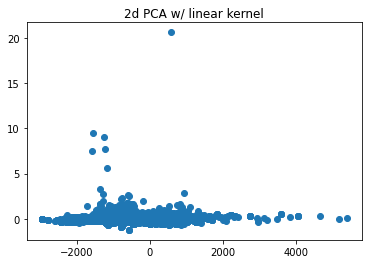

Latent space from PCA, polynomial kernel: 
[[-1.31773573e+10  1.20393242e+07]
 [-1.93075091e+10  1.17455746e+07]
 [-1.79664393e+10  6.87105603e+06]
 ...
 [ 1.12149413e+10  2.54183497e+06]
 [ 9.74806501e+09  2.94752831e+06]
 [-1.26800549e+10  9.23624344e+06]]



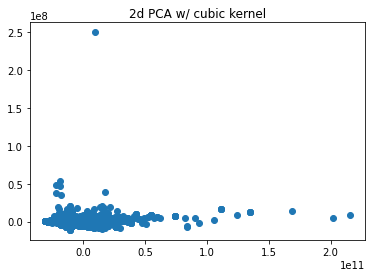

Latent space from PCA, rbf kernel: 
[[-0.00193356 -0.00143001]
 [-0.00189891 -0.00140309]
 [-0.00215196 -0.00160069]
 ...
 [-0.00362824 -0.0027907 ]
 [-0.00429353 -0.00346029]
 [-0.00206844 -0.00153504]]



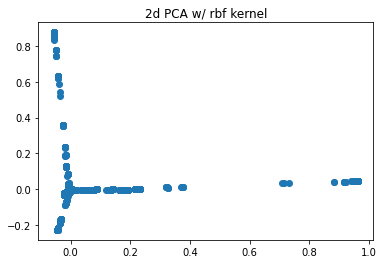

Latent space from PCA, cosine kernel: 
[[ 3.54688089e-04  1.88765630e-04]
 [ 4.62323869e-04  1.51737997e-04]
 [ 2.34098624e-04  6.12398240e-05]
 ...
 [ 4.26748215e-05 -1.34925577e-05]
 [ 4.85405399e-05 -1.33346045e-05]
 [ 2.60864456e-04  1.25028803e-04]]



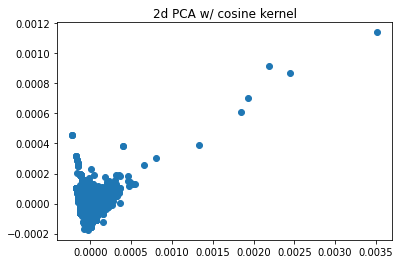

In [41]:
#PCA

kpca = KernelPCA(n_components=2, kernel='linear') 
kpca.fit(X);
X_kpca = kpca.transform(X)

print(f"Latent space from PCA, linear kernel: \n{X_kpca}\n")

plt.title('2d PCA w/ linear kernel')
plt.scatter(X_kpca[:,0], X_kpca[:,1])
plt.show()

kpca = KernelPCA(n_components=2, kernel='poly', degree=3) #increasing degree of poly kernel seems to reduce variance.
kpca.fit(X);
X_kpca = kpca.transform(X)

print(f"Latent space from PCA, polynomial kernel: \n{X_kpca}\n")

plt.title('2d PCA w/ cubic kernel')
plt.scatter(X_kpca[:,0], X_kpca[:,1])
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf') 
kpca.fit(X);
X_kpca = kpca.transform(X)

print(f"Latent space from PCA, rbf kernel: \n{X_kpca}\n")

plt.title('2d PCA w/ rbf kernel')
plt.scatter(X_kpca[:,0], X_kpca[:,1])
plt.show()


kpca = KernelPCA(n_components=2, kernel='cosine') 
kpca.fit(X);
X_kpca = kpca.transform(X)

print(f"Latent space from PCA, cosine kernel: \n{X_kpca}\n")

plt.title('2d PCA w/ cosine kernel')
plt.scatter(X_kpca[:,0], X_kpca[:,1])
plt.show()

In [ ]:
#we need to extract classes or habitability metric in a deterministic fashion from this data.
#Do this using multivariate Gaussian distribution centered around sun data.
                                                                   
#gaussian: (mean vector, cov matrix) -> (num -> prob)
def gaussian(mu, sig):
    return lambda x : (1 / (2 * PI * np.linalg.det(sig))**(1/2)) * np.exp(-1/2 * np.transpose(np.subtract(x, mu)) * np.linalg.inv(sig) * np.subtract(x,mu))


sun_likeness = gaussian(m_sun, corr_X)



In [ ]:
from sklearn.cluster import KMeans

